In [80]:
# load file
import numpy as np
# f = np.load("./model_maxtime_combine_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
f = np.load("./model_maxtime_time_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
print(f"key: {f.files}")
predict_proba = f["predict_proba"][:,1]
equen = f["equen"]
vertex = f["vertex"]
labels = f["labels"]
pdgs = f["pdg_bkg"]
# print("predict_proba: ", predict_proba)
# print("labels: ", labels)
# print("pdg:  ", pdgs)

key: ['predict_proba', 'equen', 'vertex', 'labels', 'pdg_bkg']


In [81]:
# seperate sig and bkg
dir_proba ={}
dir_vertex = {}
dir_equen = {}
dir_proba["sig"] = predict_proba[labels==1]
dir_proba["bkg"] = predict_proba[labels==0]
dir_vertex["sig"] = vertex[labels==1]
dir_vertex["bkg"] = vertex[labels==0]
dir_equen["sig"] = equen[labels==1]
dir_equen["bkg"] = equen[labels==0]

# print("Check bkg length: ")
# print("proba->  ", len(dir_proba["bkg"]))
# print("pdg-> ", len(pdgs))
# print("vertex-> ", len(dir_vertex["bkg"]))

In [82]:
# Study pdgs
from collections import Counter
def GetNucleiNum(pdg_evt):
    n_nuclei = 0
    counter = Counter(pdg_evt)
    for key in counter:
        if key > 1000000000:
            n_nuclei += counter[key]
    return n_nuclei

def PdgToN(Nuclei_pdg):
    N = int(Nuclei_pdg/10)%1000
    Z = int(Nuclei_pdg/10000)%1000
    return (N, Z)

class OneNucleiEvts:
    def __init__(self):
        self.probs = []
        self.v_NZ = []
    def Print(self):
        print(f"probs: {self.probs}")
        print(f"v_NZ: {self.v_NZ}")
evt_1Nuclei = OneNucleiEvts()

for i, pdg_evt in enumerate(pdgs):
    n_nuclei = GetNucleiNum(pdg_evt)
    if n_nuclei == 1 :
        Nuclei_pdg = pdg_evt[pdg_evt>1000000000][0]
        (N, Z ) = PdgToN(Nuclei_pdg)
        evt_1Nuclei.probs.append(dir_proba["bkg"][i])
        evt_1Nuclei.v_NZ.append([N,Z])
# evt_1Nuclei.Print()
    

## Check $^{11}C$ and $^{10}B$ Background (Signal like ratio)



<ipython-input-79-71e0d848db58>:25: RuntimeWarning: invalid value encountered in true_divide
  h_ratio = np.nan_to_num(np.array(h_siglike[0])/((np.array(h_bkglike[0]))+np.array(h_siglike[0])))


Text(0.5, 1.0, 'Ratio(Sig-like/Total)')

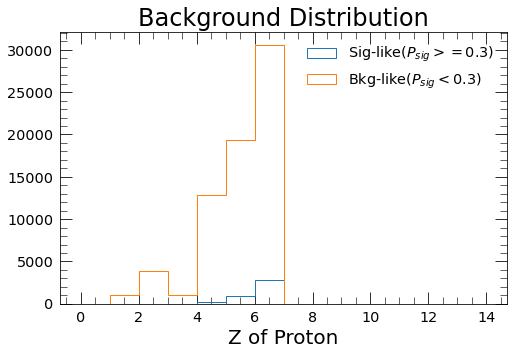

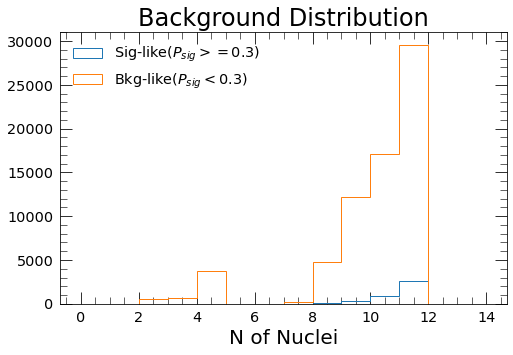

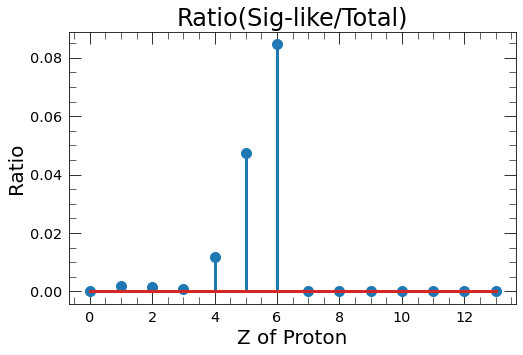

In [79]:
%matplotlib inline
## Draw Nuclei distribution
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")

criteria = 0.3
index_siglike = (np.array(evt_1Nuclei.probs)>=criteria)
index_bkglike = (np.array(evt_1Nuclei.probs)<criteria)

plt.figure(figsize=(8, 5))
h_siglike = plt.hist(np.array(evt_1Nuclei.v_NZ)[index_siglike][:,1], bins=range(0, 15), histtype='step', label="Sig-like($P_{sig}>=$"+str(criteria)+")")
h_bkglike = plt.hist(np.array(evt_1Nuclei.v_NZ)[index_bkglike][:,1], bins=range(0, 15), histtype='step', label="Bkg-like($P_{sig}<$"+str(criteria)+")")
plt.title("Background Distribution")
plt.xlabel("Z of Proton")
plt.legend()

plt.figure(figsize=(8, 5))
plt.hist(np.array(evt_1Nuclei.v_NZ)[index_siglike][:,0], bins=range(0, 15), histtype='step', label="Sig-like($P_{sig}>=$"+str(criteria)+")")
plt.hist(np.array(evt_1Nuclei.v_NZ)[index_bkglike][:,0], bins=range(0, 15), histtype='step', label="Bkg-like($P_{sig}<$"+str(criteria)+")")
plt.title("Background Distribution")
plt.xlabel("N of Nuclei")
plt.legend(loc="upper left")

plt.figure(figsize=(8, 5))
h_ratio = np.nan_to_num(np.array(h_siglike[0])/((np.array(h_bkglike[0]))+np.array(h_siglike[0])))
plt.stem(h_ratio)
plt.xlabel("Z of Proton")
plt.ylabel("Ratio")
plt.title("Ratio(Sig-like/Total)")